라이브러리 임포트

In [1]:
## library import - data preprocessing
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
## BERT embedding 
from transformers import BertTokenizer, BertModel
import torch 

In [3]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
## 평가 지표 
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [5]:
## visualization
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [6]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

In [7]:
# tqdm 
from tqdm import tqdm 

In [8]:

# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

데이터 로드

In [9]:
pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [11]:
# load USvideo Dataset
df = pd.read_csv(os.path.join(path, "USvideos.csv"))

In [12]:
# data 확인
df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [13]:
# 데이터 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

data prepocessing

Null/duplicate check

In [14]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [15]:
# 중복 확인 
df.duplicated().sum()

48

In [16]:
# 중복된 행 확인 
df[df.duplicated()]

video_id trending_date  \
34899  QBL8IRJ5yHU      18.15.05   
34900  t4pRQ0jn23Q      18.15.05   
34901  j4KvrAUjn6c      18.15.05   
34902  MAjY8mCTXWk      18.15.05   
34903  xhs8tf1v__w      18.15.05   
34904  E21NATEP9QI      18.15.05   
34905  jzLlsbdrwQk      18.15.05   
34906  1RZYOeQeIXE      18.15.05   
34907  WF82ABLw8s4      18.15.05   
34908  r-3iathMo7o      18.15.05   
34909  NBSAQenU2Bk      18.15.05   
34910  Xpv-sEKl1B4      18.15.05   
34911  HrQNdClwMs4      18.15.05   
34913  4oqvNR1o3Zo      18.15.05   
34914  96oKlWv5wSo      18.15.05   
34915  oRexsyztGS0      18.15.05   
34916  MT7RQ0gu8ak      18.15.05   
34917  1U1u5aKU3AY      18.15.05   
34918  xTrwT0jSUg0      18.15.05   
34919  3g5O-kT9m8k      18.15.05   
34921  Dwc27Lsr1EY      18.15.05   
34922  6ijnv-jNhUA      18.15.05   
34923  D2mxKEa2xmA      18.15.05   
34924  OUBx_raReDw      18.15.05   
34925  BspHjvU11y4      18.15.05   
34926  nRc0kmOYgzQ      18.15.05   
34927  UfKmSfgFxi8      18.15.05   
34928  _iGAptGAweo      18.15.05   
34929  DGdSlnw4D_M      18.15.05   
34930  BfawmhUVXVo      18.15.05   
34931  LtpqdJkoKm8      18.15.05   
34932  mAfkkgw_-68      18.15.05   
34933  rQEqKZ7CJlk      18.15.05   
34934  OXVm3fhYsEo      18.15.05   
34935  ksjWPxFPsos      18.15.05   
34936  UQkBcHLZOqU      18.15.05   
34937  mdWcaWBxxcY      18.15.05   
34938  Am6NHDbj6XA      18.15.05   
34939  vjSohj-Iclc      18.15.05   
34940  CPjWgk0UXps      18.15.05   
34941  uxbQATBAXf8      18.15.05   
34942  y_WoOYybCro      18.15.05   
34943  oSEeK9yDNQI      18.15.05   
34944  iILJvqrAQ_w      18.15.05   
34945  zcEE8J2Bqa8      18.15.05   
34946  q1jzwV_s8_Y      18.15.05   
34947  mkz1zoo15zI      18.15.05   
34948  2PH7dK6SLC8      18.15.05   

                                                   title  \
34899  Why I'm So Scared (being myself and crying too...   
34900  YoungBoy Never Broke Again Goes Sneaker Shoppi...   
34901         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
34902  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...   
34903  Terry Crews Answers the Web's Most Searched Qu...   
34904        Why Stradivarius violins are worth millions   
34905                           $17 Pet vs. $100,000 Pet   
34906   Sarah Paulson Gets Scared During '5 Second Rule'   
34907  Gabby Barrett Sings I Have Nothing by Whitney ...   
34908               The ULTIMATE $30,000 Gaming PC Setup   
34909  Rooster Teeth Animated Adventures - Millie So ...   
34910  Why You Should Wake Up at 4:30 AM Every Day, A...   
34911          DIY GIANT McDONALDS HASH BROWN 🍟 - VERSUS   
34913  24 HOUR BOX FORT PRISON ESCAPE ROOM!! 📦🚔 Diggi...   
34914  AMAZING All You Can Eat  BBQ KEBAB Buffet in I...   
34915      Exciting iPhone 11 Leaks & Round Apple Watch!   
34916  DO PARENTS KNOW MODERN MUSIC? #17 (REACT: Do T...   
34917  New lava fissures fuel fears of eruption in Ha...   
34918                            Mother Knows Best - SNL   
34919                       $1000 Survival Kit in a Case   
34921  MANIFEST | Official Trailer | NBC Fall Shows 2018   
34922                  Make a Glowing Announcement Board   
34923       10 Most DEVASTATING Cyber Attacks in History   
34924  Amanda Nunes vs Raquel Pennington | HIGHLIGHTS...   
34925  Kelly Clarkson - Meaning of Life [Official Video]   
34926  We built the Infinity Gauntlet with 25,000 mag...   
34927         FORTNITE The Movie (Official Fake Trailer)   
34928  Timed Mile in P.E. | Hannah Stocking & Anwar J...   
34929               Fortnite | Real Life Battle Royale!!   
34930  ‘A Change Is Gonna Come’ for Lifford after he ...   
34931  COLLEGE KIDS REACT TO THIS IS AMERICA - CHILDI...   
34932     We Tried To Re-Create This Giant Cinnamon Roll   
34933                    Bangabandhu Satellite-1 Mission   
34934  KYLIE COSMETICS X KRIS JENNER COLLECTION | SWA...   
34935                      Can you Shrek it? (YIAY #414)   
34936            Wearing Fashion Nova Outfits For A Week   
34937  Rita Ora - Girls f

category mapping

In [17]:
## 카테고리 매핑 
# JSON 파일 경로
json_path = os.path.join(path, "US_category_id.json")

# JSON 로드
with open(json_path, 'r', encoding='utf-8') as f:
    category_json = json.load(f)

# 카테고리 매핑 딕셔너리 생성
category_mapping = {
    int(item['id']): item['snippet']['title']
    for item in category_json['items']
}

In [18]:
# 매핑 딕셔너리 확인
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [19]:
df['category_name'] = df['category_id'].map(category_mapping)

In [20]:
df['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object

target log-scaling

In [21]:
# log-scaling 진행
df['log_views'] = np.log1p(df['views'])

Modeling #1. category_id를 feature로 포함

In [22]:
# category를 포함한 열 불러오기 
category_df = df[['title', 'log_views', 'category_id']]
category_df

title  log_views  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE  13.525659   
1      The Trump Presidency: Last Week Tonight with J...  14.698775   
2      Racist Superman | Rudy Mancuso, King Bach & Le...  14.975981   
3                       Nickelback Lyrics: Real or Fake?  12.745978   
4                               I Dare You: GOING BALD!?  14.555413   
...                                                  ...        ...   
40944                       The Cat Who Caught the Laser  14.337638   
40945                         True Facts : Ant Mutualism  13.878297   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...  13.879848   
40947                How Black Panther Should Have Ended  15.549078   
40948  Official Call of Duty®: Black Ops 4 — Multipla...  16.148248   

       category_id  
0               22  
1               24  
2               23  
3               24  
4               24  
...            ...  
40944           15  
40945           22  
40946           24  
40947            1  
40948           20  

[40949 rows x 3 columns]

In [23]:
# BERT load 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
# BERT embedding extract 

## CLS 벡터 추출 함수 정의 

def extract_cls_embedding(text):
    encoding = tokenizer(text,
                         max_length=32,
                         truncation=True,
                         padding='max_length',
                         return_tensors='pt')
    input_ids_tensor = encoding['input_ids'].to(device)
    attention_mask_tensor = encoding['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids_tensor, attention_mask=attention_mask_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

In [25]:
import numpy as np
embeddings = np.load("title_cls_embeddings.npy")

Modeling#2 category별 Model 구축

In [26]:
# category별 데이터 수 확인 
category_counts = df['category_name'].value_counts().sort_values(ascending=True)

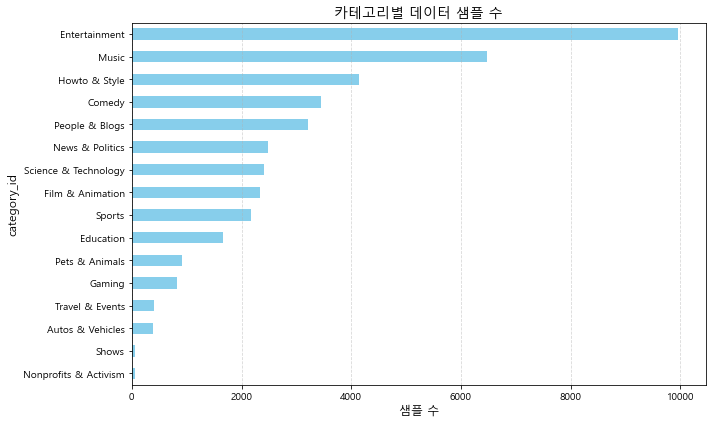

In [27]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')

plt.title("카테고리별 데이터 샘플 수", fontsize=14)
plt.xlabel("샘플 수", fontsize=12)
plt.ylabel("category_id", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
# BERT embedding에 category 결합
category_df['title_embedding'] = list(embeddings)

C:\Users\user\AppData\Local\Temp\ipykernel_10708\3614589385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['title_embedding'] = list(embeddings)


Howto&style

In [31]:
# category filtering
cat_name = "Howto & Style"
group = category_df[category_df['category_id'] == 26]

X = np.vstack(group['title_embedding'].values)
y = group['log_views']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Howto & Style - Lasso

In [32]:
# Lasso 모델 정의
alpha_value = 0.0001
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Lasso")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장 
lasso_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Lasso",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: Lasso
Alpha: 0.0001
RMSE: 0.5579
R²: 0.829
Spearman: 0.9421


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+02, tolerance: 5.771e-01
  model = cd_fast.enet_coordinate_descent(


Howto & Style - Linear Regression

In [33]:
# LinearRegression 모델 정의 및 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: LinearRegression")
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
linear_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "LinearRegression",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: LinearRegression
RMSE: 0.577
R²: 0.8171
Spearman: 0.9453


Howto & Style - Ridge

In [34]:
# Ridge 모델 정의 및 학습
alpha_value = 1.0
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Ridge")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
ridge_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Ridge",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: Ridge
Alpha: 1.0
RMSE: 0.5708
R²: 0.821
Spearman: 0.9352


Howto & Style - RF

In [35]:
# RF 모델 정의 및 학습
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: RandomForest")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
rf_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "RandomForest",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: RandomForest
n_estimators: 100
RMSE: 0.4219
R²: 0.9022
Spearman: 0.9645


Howto & Style - Gradient

In [36]:
# Gradient Boosting 모델 정의 및 학습
n_estimators = 100
gbr = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: GradientBoosting")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
gbr_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "GradientBoosting",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: GradientBoosting
n_estimators: 100
RMSE: 0.6114
R²: 0.7947
Spearman: 0.9194


In [37]:
# 모델별 결과 DataFrame 합치기
all_results = pd.concat([
    lasso_results_df,
    linear_results_df,
    ridge_results_df,
    rf_results_df,
    gbr_results_df
], ignore_index=True)

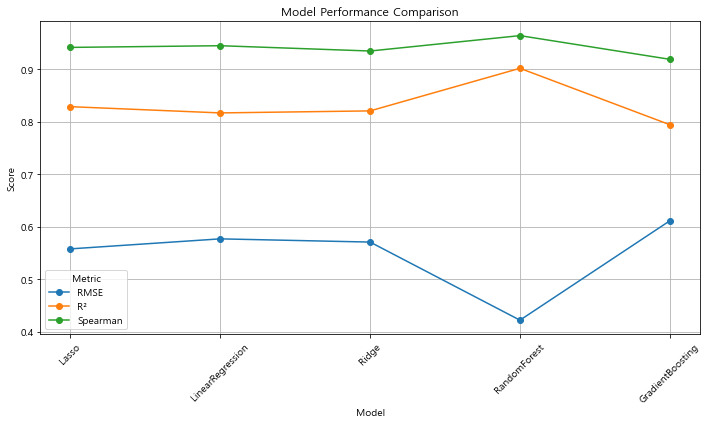

In [38]:
# 시각화를 위한 변환 (wide → long)
results_long = all_results.melt(
    id_vars="Model", 
    value_vars=["RMSE", "R²", "Spearman"],
    var_name="Metric", 
    value_name="Score"
)

# 선 그래프(line chart)로 시각화
plt.figure(figsize=(10, 6))
for metric in results_long["Metric"].unique():
    subset = results_long[results_long["Metric"] == metric]
    plt.plot(subset["Model"], subset["Score"], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()

Howto &Style 파라미터튜닝(베이지안 최적화 사용)

In [39]:
!pip install BayesianOptimization

Defaulting to user installation because normal site-packages is not writeable


In [40]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Howto & Style - Lasso(베이지안 최적화)

In [41]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

def objective_lasso(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
    model = Lasso(alpha=alpha)
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return -score.mean()

study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=50)

# 튜닝된 모델로 최종 학습 및 평가
best_alpha = study_lasso.best_params['alpha']
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)
y_pred = lasso_best.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

# 출력
print("Category:", cat_name)
print("Model: Lasso (Bayesian)")
print("Best Alpha:", best_alpha)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
lasso_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Lasso (Bayesian)",
    "Alpha": best_alpha,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])


[I 2025-06-08 14:25:25,367] A new study created in memory with name: no-name-ba352208-7ff3-41ae-94e6-b407e94e291f
C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+02, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.907e+01, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.720e+01, tolerance: 4.622e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+02, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.549e+01, t

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.401e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+02, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.408e+00, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.389e+00, tolerance: 4.622e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.338e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.619e+01, t

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.189e+01, tolerance: 4.622e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.254e+01, tolerance: 4.575e-01
  model = cd_fast.enet_coordinate_descent(
[I 2025-06-08 14:27:56,362] Trial 27 finished with value: 0.2489423402496259 and parameters: {'alpha': 3.63354994009812e-05}. Best is trial 17 with value: 0.2350081354470841.
C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: sugges

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.775e+01, tolerance: 4.622e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.608e+01, tolerance: 4.575e-01
  model = cd_fast.enet_coordinate_descent(
[I 2025-06-08 14:28:22,387] Trial 32 finished with value: 0.26328401385449646 and parameters: {'alpha': 0.00018701351094849524}. Best is trial 17 with value: 0.2350081354470841.
C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: sug

C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.371e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.985e+01, t

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.891e+01, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.893e+01, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Local\Temp\ipykernel_10708\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.128e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.667e+01, t

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+02, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+02, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

Category: Howto & Style
Model: Lasso (Bayesian)
Best Alpha: 6.539288645450396e-05
RMSE: 0.5532
R²: 0.8319
Spearman: 0.9433


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+02, tolerance: 5.771e-01
  model = cd_fast.enet_coordinate_descent(


Howto & Style - Linear Regression

In [42]:
# LinearRegression 모델 정의 및 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: LinearRegression")
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
linear_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "LinearRegression",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: LinearRegression
RMSE: 0.577
R²: 0.8171
Spearman: 0.9453


Howto & Style - Ridge(베이지안 최적화)

In [43]:
def objective_ridge(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
    model = Ridge(alpha=alpha)
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return -score.mean()

study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=50)

# 최적 모델 적용
best_alpha = study_ridge.best_params['alpha']
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
y_pred = ridge_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

print("Category:", cat_name)
print("Model: Ridge (Bayesian)")
print("Alpha:", best_alpha)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", round(spearman_corr, 4) if not np.isnan(spearman_corr) else "NaN")

ridge_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Ridge (Bayesian)",
    "Alpha": best_alpha,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])


[I 2025-06-08 14:36:55,808] A new study created in memory with name: no-name-af21f904-dd2d-44b1-bdf5-a909c8824cce
C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.08396e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.08385e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklea

C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 14:37:09,026] Trial 9 finished with value: 0.2507687953752504 and parameters: {'alpha': 4.155443558036443e-05}. Best is trial 4 with value: 0.24841678547834337.
C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.52173e-08): result may not be ac

C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.58088e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.59607e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.53898e-09): result may not be accura

C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 14:37:15,812] Trial 27 finished with value: 0.31353370544089987 and parameters: {'alpha': 1.9411771658826942}. Best is trial 19 with value: 0.23981716100349698.
C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 14:37:16,150] Trial 28 finished with value: 0.23983592689251285 and parameters: {'alpha': 0.1416421206222556}. Best is trial 19 with value: 0.23981716100349698.


C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 14:37:19,173] Trial 37 finished with value: 0.2397899964938511 and parameters: {'alpha': 0.1356127143833219}. Best is trial 37 with value: 0.2397899964938511.
C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.40483e-08): result may not be accu

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.32936e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.29342e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.30839e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
[I 2025-06-08 14:37:26,282] Trial 47 finished with value: 0.24872095169181696 and parameters: {'alpha': 0.008840431881790218}. Best is trial 37 with value: 0.2397899964938511.
C:\Users\user\AppData\Local\Temp\ipykernel_10708\3443496583.py:2: FutureWarning:

Category: Howto & Style
Model: Ridge (Bayesian)
Alpha: 0.1356127143833219
RMSE: 0.5517
R²: 0.8328
Spearman: 0.946


Howto & Style - RF(베이지안 최적화)

In [47]:
def objective_rf(trial):
    model = RandomForestRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        max_depth=trial.suggest_int("max_depth", 5, 50),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),  # ✅ 'auto' 제거
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(
        model, X_train, y_train,
        scoring='neg_mean_squared_error',
        cv=3,
        error_score=np.nan  # ✅ 에러 방지
    )
    return -np.nanmean(score)  # 모든 score가 nan인 경우 대비


study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

best_params_rf = study_rf.best_params
rf_best = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

print("Category:", cat_name)
print("Model: RandomForest (Bayesian)")
print("Params:", best_params_rf)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", round(spearman_corr, 4) if not np.isnan(spearman_corr) else "NaN")

rf_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "RandomForest (Bayesian)",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])


[I 2025-06-08 15:05:35,235] A new study created in memory with name: no-name-84decac0-2efe-4ffb-93c3-0df26f7c9e06


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-08 15:05:39,980] Trial 0 finished with value: 0.2883128015563874 and parameters: {'n_estimators': 204, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.2883128015563874.
[I 2025-06-08 15:06:09,591] Trial 1 finished with value: 0.22696856415157493 and parameters: {'n_estimators': 495, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.22696856415157493.
[I 2025-06-08 15:06:14,097] Trial 2 finished with value: 0.2651171568810303 and parameters: {'n_estimators': 174, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.22696856415157493.
[I 2025-06-08 15:06:22,870] Trial 3 finished with value: 0.2990006079837239 and parameters: {'n_estimators': 394, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.2269685641

[I 2025-06-08 15:16:08,533] Trial 33 finished with value: 0.23498928016599416 and parameters: {'n_estimators': 240, 'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 29 with value: 0.20053099363730864.
[I 2025-06-08 15:16:25,025] Trial 34 finished with value: 0.2004263748439762 and parameters: {'n_estimators': 286, 'max_depth': 38, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 34 with value: 0.2004263748439762.
[I 2025-06-08 15:16:32,736] Trial 35 finished with value: 0.2345292333436145 and parameters: {'n_estimators': 229, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 34 with value: 0.2004263748439762.
[I 2025-06-08 15:16:49,534] Trial 36 finished with value: 0.20078193679619302 and parameters: {'n_estimators': 279, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 34 with value: 0.200

Howto & Style - Gradient(베이지안 최적화)

In [ ]:
def objective_gbr(trial):
    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        random_state=42
    )
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
    return -score.mean()

study_gbr = optuna.create_study(direction='minimize')
study_gbr.optimize(objective_gbr, n_trials=50)

best_params_gbr = study_gbr.best_params
gbr_best = GradientBoostingRegressor(**best_params_gbr, random_state=42)
gbr_best.fit(X_train, y_train)
y_pred = gbr_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

print("Category:", cat_name)
print("Model: GradientBoosting (Bayesian)")
print("Params:", best_params_gbr)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", round(spearman_corr, 4) if not np.isnan(spearman_corr) else "NaN")

gbr_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "GradientBoosting (Bayesian)",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])
